# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:31:36.954448: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:31:40.838613
2025-04-14 19:31:40.838613


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 259
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:31:34"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

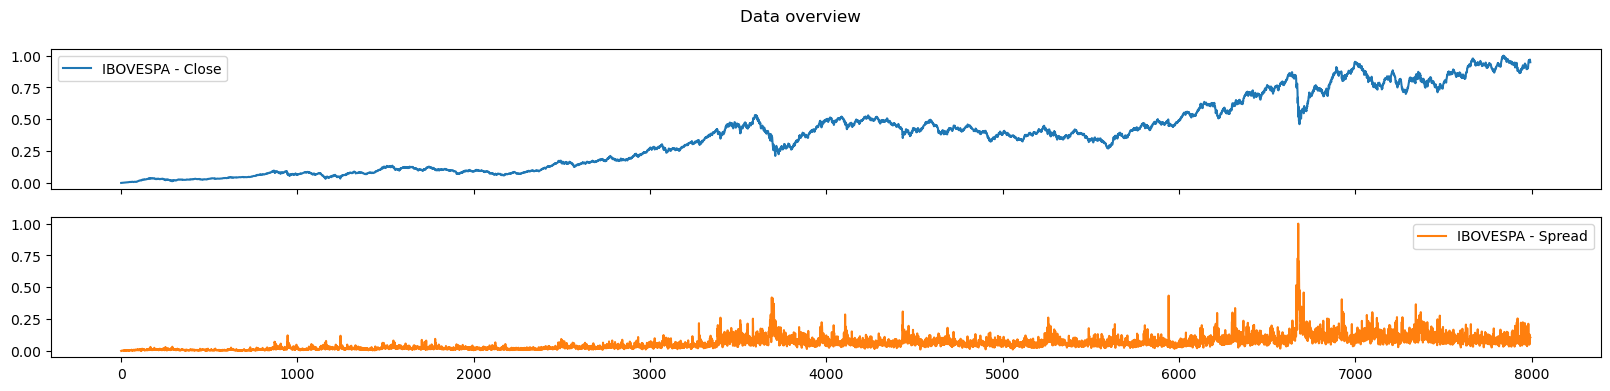

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

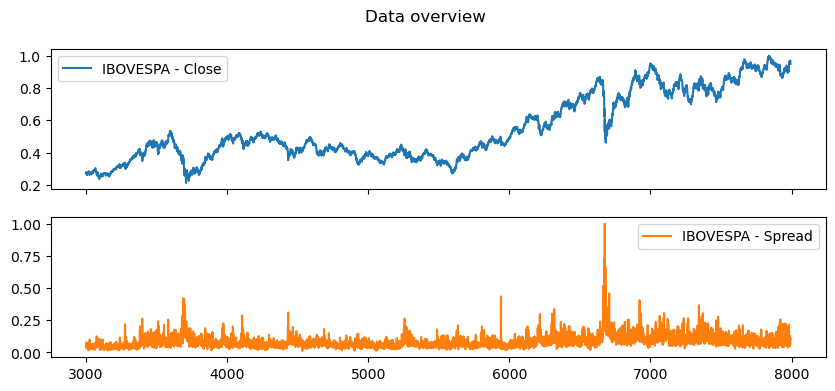

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

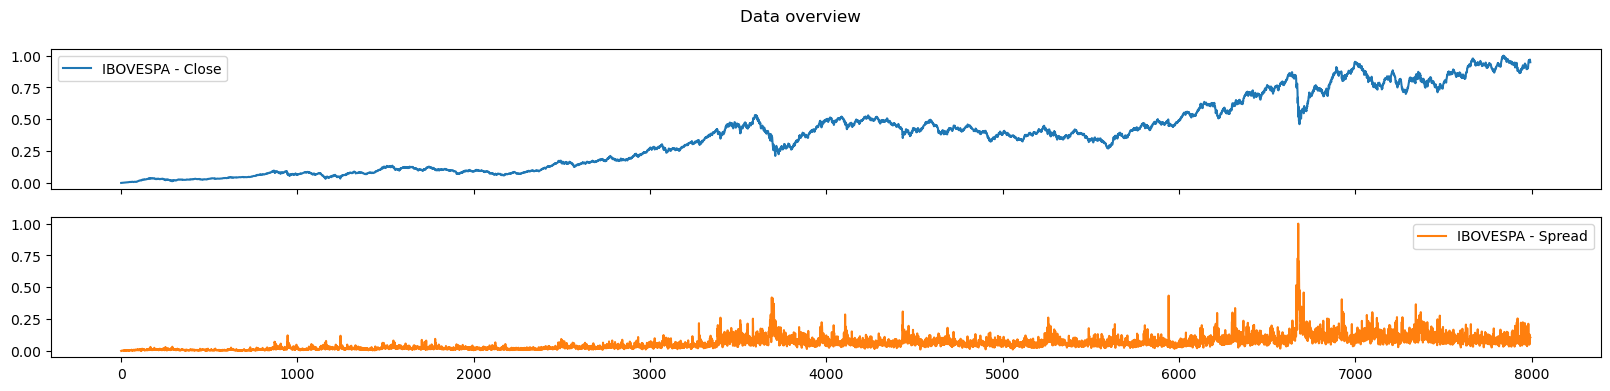

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

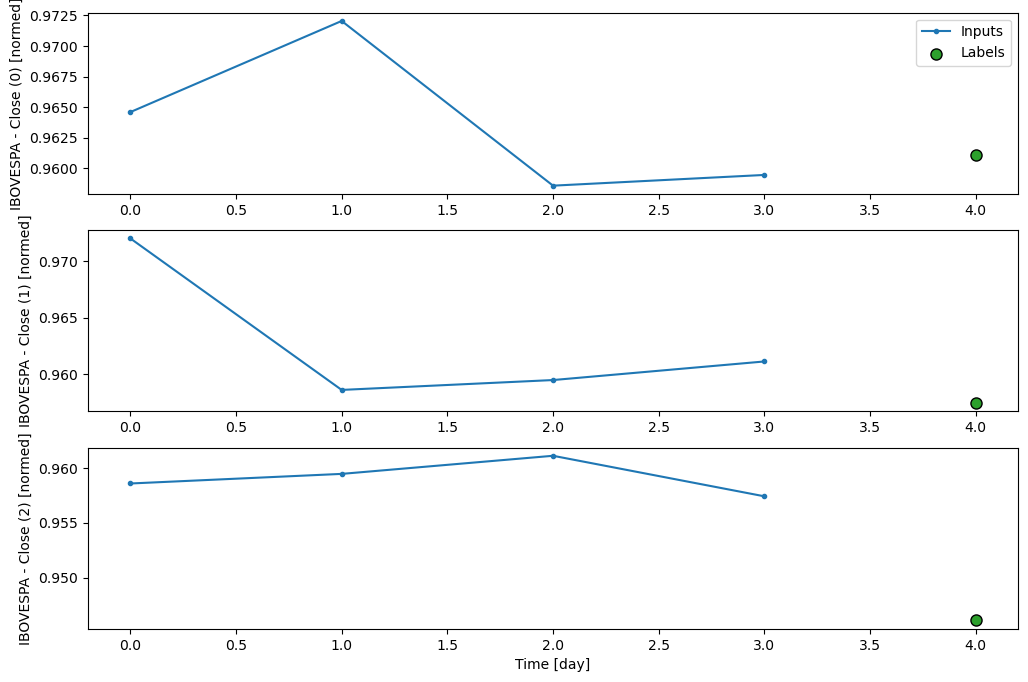

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

2

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 19:03 5s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 54.1134 - mean_squared_error: 3.7831e-05 - root_mean_squared_error: 0.0058   

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 44.9417 - mean_squared_error: 4.4527e-05 - root_mean_squared_error: 0.0065

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 38.7652 - mean_squared_error: 4.5257e-05 - root_mean_squared_error: 0.0066

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 35.1235 - mean_squared_error: 4.9676e-05 - root_mean_squared_error: 0.0069

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 32.7863 - mean_squared_error: 6.2678e-05 - root_mean_squared_error: 0.0076

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 31.1631 - mean_squared_error: 7.6986e-05 - root_mean_squared_error: 0.0084

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 29.8907 - mean_squared_error: 9.2908e-05 - root_mean_squared_error: 0.0091

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 28.6110 - mean_squared_error: 1.0776e-04 - root_mean_squared_error: 0.0098

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.6515 - mean_squared_error: 1.1764e-04 - root_mean_squared_error: 0.0103

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 26.7629 - mean_squared_error: 1.2740e-04 - root_mean_squared_error: 0.0107

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 26.2267 - mean_squared_error: 1.5076e-04 - root_mean_squared_error: 0.0115

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 25.7453 - mean_squared_error: 1.8436e-04 - root_mean_squared_error: 0.0125

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 25.3767 - mean_squared_error: 2.1831e-04 - root_mean_squared_error: 0.0135

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 25.0217 - mean_squared_error: 2.5339e-04 - root_mean_squared_error: 0.0144

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 24.6726 - mean_squared_error: 2.9136e-04 - root_mean_squared_error: 0.0153

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 24.3053 - mean_squared_error: 3.4637e-04 - root_mean_squared_error: 0.0165

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 24.0365 - mean_squared_error: 4.1739e-04 - root_mean_squared_error: 0.0178

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 23.8105 - mean_squared_error: 5.7501e-04 - root_mean_squared_error: 0.0201

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 23.6391 - mean_squared_error: 7.2544e-04 - root_mean_squared_error: 0.0221

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 23.4417 - mean_squared_error: 8.8329e-04 - root_mean_squared_error: 0.0241

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 23.2613 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0257    

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 23.0854 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0272

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 22.9054 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0285

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 22.7250 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0297

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 22.5274 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0310

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 22.3708 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0321

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 22.2019 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0333

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 22.0477 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0343

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 21.8991 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0354

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 21.7579 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0365

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 21.6230 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0376

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 21.4897 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0387


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 21.4146 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0393 - val_loss: 0.1073 - val_mean_absolute_error: 0.1073 - val_mean_absolute_percentage_error: 11.4453 - val_mean_squared_error: 0.0130 - val_root_mean_squared_error: 0.1141


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.8049 - mean_absolute_error: 0.8049 - mean_absolute_percentage_error: 37766.3945 - mean_squared_error: 0.6478 - root_mean_squared_error: 0.8049

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8063 - mean_absolute_error: 0.8063 - mean_absolute_percentage_error: 17600.8496 - mean_squared_error: 0.6505 - root_mean_squared_error: 0.8065 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7659 - mean_absolute_error: 0.7659 - mean_absolute_percentage_error: 12227.0244 - mean_squared_error: 0.5951 - root_mean_squared_error: 0.7702

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7121 - mean_absolute_error: 0.7121 - mean_absolute_percentage_error: 9924.5283 - mean_squared_error: 0.5378 - root_mean_squared_error: 0.7297 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6564 - mean_absolute_error: 0.6564 - mean_absolute_percentage_error: 8427.7979 - mean_squared_error: 0.4841 - root_mean_squared_error: 0.6888

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6096 - mean_absolute_error: 0.6096 - mean_absolute_percentage_error: 7368.3950 - mean_squared_error: 0.4399 - root_mean_squared_error: 0.6531

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5688 - mean_absolute_error: 0.5688 - mean_absolute_percentage_error: 6572.5156 - mean_squared_error: 0.4031 - root_mean_squared_error: 0.6219

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5329 - mean_absolute_error: 0.5329 - mean_absolute_percentage_error: 5948.4985 - mean_squared_error: 0.3723 - root_mean_squared_error: 0.5945

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4968 - mean_absolute_error: 0.4968 - mean_absolute_percentage_error: 5379.6904 - mean_squared_error: 0.3428 - root_mean_squared_error: 0.5672

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4691 - mean_absolute_error: 0.4691 - mean_absolute_percentage_error: 4972.9771 - mean_squared_error: 0.3208 - root_mean_squared_error: 0.5461

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4447 - mean_absolute_error: 0.4447 - mean_absolute_percentage_error: 4629.7466 - mean_squared_error: 0.3018 - root_mean_squared_error: 0.5273

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4230 - mean_absolute_error: 0.4230 - mean_absolute_percentage_error: 4335.6055 - mean_squared_error: 0.2851 - root_mean_squared_error: 0.5104

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4011 - mean_absolute_error: 0.4011 - mean_absolute_percentage_error: 4046.6411 - mean_squared_error: 0.2684 - root_mean_squared_error: 0.4929

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3839 - mean_absolute_error: 0.3839 - mean_absolute_percentage_error: 3826.8059 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4791

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3683 - mean_absolute_error: 0.3683 - mean_absolute_percentage_error: 3632.0203 - mean_squared_error: 0.2440 - root_mean_squared_error: 0.4664

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 3458.1028 - mean_squared_error: 0.2335 - root_mean_squared_error: 0.4548

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3416 - mean_absolute_error: 0.3416 - mean_absolute_percentage_error: 3301.7808 - mean_squared_error: 0.2240 - root_mean_squared_error: 0.4440

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3303 - mean_absolute_error: 0.3303 - mean_absolute_percentage_error: 3160.4954 - mean_squared_error: 0.2154 - root_mean_squared_error: 0.4341

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3200 - mean_absolute_error: 0.3200 - mean_absolute_percentage_error: 3032.0396 - mean_squared_error: 0.2075 - root_mean_squared_error: 0.4249

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3104 - mean_absolute_error: 0.3104 - mean_absolute_percentage_error: 2914.6602 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4163

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3016 - mean_absolute_error: 0.3016 - mean_absolute_percentage_error: 2806.9492 - mean_squared_error: 0.1936 - root_mean_squared_error: 0.4082

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2934 - mean_absolute_error: 0.2934 - mean_absolute_percentage_error: 2707.7126 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.4006

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 2615.9446 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3935

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 2519.1428 - mean_squared_error: 0.1755 - root_mean_squared_error: 0.3857

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2708 - mean_absolute_error: 0.2708 - mean_absolute_percentage_error: 2440.7114 - mean_squared_error: 0.1705 - root_mean_squared_error: 0.3794

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 2367.5044 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3733

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2594 - mean_absolute_error: 0.2594 - mean_absolute_percentage_error: 2308.5181 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3684

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2554 - mean_absolute_error: 0.2554 - mean_absolute_percentage_error: 2261.7969 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3644

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 2199.8071 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3592

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2453 - mean_absolute_error: 0.2453 - mean_absolute_percentage_error: 2141.4714 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3542

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 2086.4656 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3495

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2365 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 2034.4972 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3450

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2325 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 1985.3094 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3407

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1938.6748 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3365


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 1900.5958 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3331 - val_loss: 0.1290 - val_mean_absolute_error: 0.1290 - val_mean_absolute_percentage_error: 13.8064 - val_mean_squared_error: 0.0180 - val_root_mean_squared_error: 0.1343


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.6269 - mean_absolute_error: 0.6269 - mean_absolute_percentage_error: 29417.8945 - mean_squared_error: 0.3931 - root_mean_squared_error: 0.6269

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6127 - mean_absolute_error: 0.6127 - mean_absolute_percentage_error: 13589.2031 - mean_squared_error: 0.3758 - root_mean_squared_error: 0.6129 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5867 - mean_absolute_error: 0.5867 - mean_absolute_percentage_error: 9763.7480 - mean_squared_error: 0.3473 - root_mean_squared_error: 0.5885 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5395 - mean_absolute_error: 0.5395 - mean_absolute_percentage_error: 7635.5684 - mean_squared_error: 0.3069 - root_mean_squared_error: 0.5509

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4980 - mean_absolute_error: 0.4980 - mean_absolute_percentage_error: 6482.0273 - mean_squared_error: 0.2758 - root_mean_squared_error: 0.5196

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4553 - mean_absolute_error: 0.4553 - mean_absolute_percentage_error: 5564.2773 - mean_squared_error: 0.2466 - root_mean_squared_error: 0.4880

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4237 - mean_absolute_error: 0.4237 - mean_absolute_percentage_error: 4972.1704 - mean_squared_error: 0.2258 - root_mean_squared_error: 0.4643

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3925 - mean_absolute_error: 0.3925 - mean_absolute_percentage_error: 4447.2256 - mean_squared_error: 0.2061 - root_mean_squared_error: 0.4410

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3688 - mean_absolute_error: 0.3688 - mean_absolute_percentage_error: 4079.8298 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4231

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3480 - mean_absolute_error: 0.3480 - mean_absolute_percentage_error: 3774.4695 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.4074

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3297 - mean_absolute_error: 0.3297 - mean_absolute_percentage_error: 3516.2209 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3933

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3135 - mean_absolute_error: 0.3135 - mean_absolute_percentage_error: 3294.5876 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3806

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2989 - mean_absolute_error: 0.2989 - mean_absolute_percentage_error: 3102.0259 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3691

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2859 - mean_absolute_error: 0.2859 - mean_absolute_percentage_error: 2932.9771 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3586

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2742 - mean_absolute_error: 0.2742 - mean_absolute_percentage_error: 2783.2363 - mean_squared_error: 0.1373 - root_mean_squared_error: 0.3491

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2635 - mean_absolute_error: 0.2635 - mean_absolute_percentage_error: 2649.5613 - mean_squared_error: 0.1314 - root_mean_squared_error: 0.3402

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2524 - mean_absolute_error: 0.2524 - mean_absolute_percentage_error: 2513.2224 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3309

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2436 - mean_absolute_error: 0.2436 - mean_absolute_percentage_error: 2406.0710 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3235

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 2308.5803 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3165

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 2219.4580 - mean_squared_error: 0.1119 - root_mean_squared_error: 0.3099

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2201 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 2126.4932 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.3030

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 2051.9385 - mean_squared_error: 0.1041 - root_mean_squared_error: 0.2973

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 1982.9431 - mean_squared_error: 0.1009 - root_mean_squared_error: 0.2919

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 1927.7567 - mean_squared_error: 0.0983 - root_mean_squared_error: 0.2875

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 1867.5144 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2826

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 1811.2887 - mean_squared_error: 0.0928 - root_mean_squared_error: 0.2780

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1876 - mean_absolute_error: 0.1876 - mean_absolute_percentage_error: 1751.4392 - mean_squared_error: 0.0899 - root_mean_squared_error: 0.2731

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1833 - mean_absolute_error: 0.1833 - mean_absolute_percentage_error: 1702.5399 - mean_squared_error: 0.0876 - root_mean_squared_error: 0.2689

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1792 - mean_absolute_error: 0.1792 - mean_absolute_percentage_error: 1656.5615 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2650

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1759 - mean_absolute_error: 0.1759 - mean_absolute_percentage_error: 1619.2742 - mean_squared_error: 0.0836 - root_mean_squared_error: 0.2618

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1723 - mean_absolute_error: 0.1723 - mean_absolute_percentage_error: 1578.0526 - mean_squared_error: 0.0816 - root_mean_squared_error: 0.2582

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1699 - mean_absolute_error: 0.1699 - mean_absolute_percentage_error: 1550.0011 - mean_squared_error: 0.0803 - root_mean_squared_error: 0.2557

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1667 - mean_absolute_error: 0.1667 - mean_absolute_percentage_error: 1512.5292 - mean_squared_error: 0.0785 - root_mean_squared_error: 0.2525

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 1477.0001 - mean_squared_error: 0.0768 - root_mean_squared_error: 0.2493


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1617 - mean_absolute_error: 0.1617 - mean_absolute_percentage_error: 1452.7375 - mean_squared_error: 0.0756 - root_mean_squared_error: 0.2472 - val_loss: 0.0688 - val_mean_absolute_error: 0.0688 - val_mean_absolute_percentage_error: 7.3138 - val_mean_squared_error: 0.0056 - val_root_mean_squared_error: 0.0751


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.3704 - mean_absolute_error: 0.3704 - mean_absolute_percentage_error: 17397.3789 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3704

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3480 - mean_absolute_error: 0.3480 - mean_absolute_percentage_error: 7962.2080 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3488  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3090 - mean_absolute_error: 0.3090 - mean_absolute_percentage_error: 5610.9502 - mean_squared_error: 0.1018 - root_mean_squared_error: 0.3166

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 4440.8130 - mean_squared_error: 0.0863 - root_mean_squared_error: 0.2891

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2429 - mean_absolute_error: 0.2429 - mean_absolute_percentage_error: 3632.5444 - mean_squared_error: 0.0736 - root_mean_squared_error: 0.2644

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 3153.4907 - mean_squared_error: 0.0654 - root_mean_squared_error: 0.2473

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 2798.3601 - mean_squared_error: 0.0590 - root_mean_squared_error: 0.2332

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1884 - mean_absolute_error: 0.1884 - mean_absolute_percentage_error: 2522.7644 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2214

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1744 - mean_absolute_error: 0.1744 - mean_absolute_percentage_error: 2273.5630 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.2099

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1641 - mean_absolute_error: 0.1641 - mean_absolute_percentage_error: 2096.5637 - mean_squared_error: 0.0457 - root_mean_squared_error: 0.2013

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1552 - mean_absolute_error: 0.1552 - mean_absolute_percentage_error: 1948.0587 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1937

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1477 - mean_absolute_error: 0.1477 - mean_absolute_percentage_error: 1821.4791 - mean_squared_error: 0.0402 - root_mean_squared_error: 0.1870

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1411 - mean_absolute_error: 0.1411 - mean_absolute_percentage_error: 1712.0488 - mean_squared_error: 0.0380 - root_mean_squared_error: 0.1811

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 1616.3280 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1757

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 1531.8004 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1708

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 1456.5411 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1663

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1209 - mean_absolute_error: 0.1209 - mean_absolute_percentage_error: 1389.0527 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1621

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 1319.9398 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1578

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 1265.4222 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1543

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 1215.6715 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1511

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 1170.0609 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1481

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 1122.3477 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1448

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 1083.9856 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1422

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 1043.5367 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1393

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 1010.7791 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1369

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 980.2152 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1347 

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 951.6255 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1326

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 924.8160 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1306

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 899.6205 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1287

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 875.8909 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1269

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 853.5022 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1252

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 832.3414 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1235

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 812.3076 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1220

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 793.3080 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1206


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 788.0636 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1202 - val_loss: 0.0516 - val_mean_absolute_error: 0.0516 - val_mean_absolute_percentage_error: 5.4892 - val_mean_squared_error: 0.0032 - val_root_mean_squared_error: 0.0566


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.3293 - mean_absolute_error: 0.3293 - mean_absolute_percentage_error: 15470.6582 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.3293

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 7072.8813 - mean_squared_error: 0.0957 - root_mean_squared_error: 0.3090  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 4807.0234 - mean_squared_error: 0.0786 - root_mean_squared_error: 0.2780

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2383 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 3742.2549 - mean_squared_error: 0.0656 - root_mean_squared_error: 0.2518

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 3169.7397 - mean_squared_error: 0.0577 - root_mean_squared_error: 0.2342

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1999 - mean_absolute_error: 0.1999 - mean_absolute_percentage_error: 2766.3733 - mean_squared_error: 0.0516 - root_mean_squared_error: 0.2201

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 2465.0747 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.2085

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 2229.9626 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.1988

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1657 - mean_absolute_error: 0.1657 - mean_absolute_percentage_error: 2040.4613 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1905

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1565 - mean_absolute_error: 0.1565 - mean_absolute_percentage_error: 1864.0248 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1823

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1493 - mean_absolute_error: 0.1493 - mean_absolute_percentage_error: 1735.3971 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1759

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 1625.1519 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1702

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 1529.5205 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1650

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 - mean_absolute_percentage_error: 1445.6492 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1603

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 1371.4258 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1561

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 1305.2129 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1521

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1186 - mean_absolute_error: 0.1186 - mean_absolute_percentage_error: 1245.7330 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1485

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 1191.9867 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1451

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 1143.1482 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1420

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 1098.5519 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1391

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 1057.6456 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1364

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 1019.9744 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1338

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 985.1571 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1314 

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 952.8692 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1291

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 922.8389 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1270

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 894.8281 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1249

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 868.6362 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1230

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 844.0841 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1211

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 821.0179 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1194

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 799.2997 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1177

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 778.8156 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1161

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 759.4621 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1147

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 741.1448 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1133

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 723.7804 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1120


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 714.2625 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1113 - val_loss: 0.0547 - val_mean_absolute_error: 0.0547 - val_mean_absolute_percentage_error: 5.8249 - val_mean_squared_error: 0.0036 - val_root_mean_squared_error: 0.0597


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.3189 - mean_absolute_error: 0.3189 - mean_absolute_percentage_error: 14982.3555 - mean_squared_error: 0.1017 - root_mean_squared_error: 0.3189

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 6894.9663 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.3063  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 4915.0938 - mean_squared_error: 0.0828 - root_mean_squared_error: 0.2867

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 4028.9741 - mean_squared_error: 0.0732 - root_mean_squared_error: 0.2682

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 3363.6990 - mean_squared_error: 0.0643 - root_mean_squared_error: 0.2495

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 2907.8645 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2344

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 2533.1125 - mean_squared_error: 0.0514 - root_mean_squared_error: 0.2202

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1870 - mean_absolute_error: 0.1870 - mean_absolute_percentage_error: 2284.5371 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.2098

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1750 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 2060.2571 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.1997

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - mean_absolute_percentage_error: 1901.2141 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1921

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1573 - mean_absolute_error: 0.1573 - mean_absolute_percentage_error: 1750.2804 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1845

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 1638.9413 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1786

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1449 - mean_absolute_error: 0.1449 - mean_absolute_percentage_error: 1542.4716 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1734

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 1457.9160 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1686

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - mean_absolute_percentage_error: 1383.1227 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1642

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1306 - mean_absolute_error: 0.1306 - mean_absolute_percentage_error: 1316.4263 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1602

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1267 - mean_absolute_error: 0.1267 - mean_absolute_percentage_error: 1256.5452 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1565

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1232 - mean_absolute_error: 0.1232 - mean_absolute_percentage_error: 1202.4500 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1532

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 1153.3126 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1501

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 1108.4727 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1473

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 1067.3527 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1446

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 1029.4822 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1422

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 994.4756 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1398 

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 962.0107 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1376

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 931.8145 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1355

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 903.6485 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1334

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 877.3206 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1316

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 852.6429 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1298

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 829.4559 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1281

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 807.6234 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1264

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 787.0248 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1249

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 767.5548 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1234

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 749.1199 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1219

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 731.6372 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1205


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 719.6968 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1196 - val_loss: 0.0398 - val_mean_absolute_error: 0.0398 - val_mean_absolute_percentage_error: 4.2367 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0439


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.4046 - mean_absolute_error: 0.4046 - mean_absolute_percentage_error: 18996.2812 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.4046

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3868 - mean_absolute_error: 0.3868 - mean_absolute_percentage_error: 8727.3877 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3873  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3594 - mean_absolute_error: 0.3594 - mean_absolute_percentage_error: 6011.0542 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3618

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3297 - mean_absolute_error: 0.3297 - mean_absolute_percentage_error: 4853.8667 - mean_squared_error: 0.1161 - root_mean_squared_error: 0.3378

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 4107.3169 - mean_squared_error: 0.1031 - root_mean_squared_error: 0.3163

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2756 - mean_absolute_error: 0.2756 - mean_absolute_percentage_error: 3519.4783 - mean_squared_error: 0.0916 - root_mean_squared_error: 0.2960

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 3140.5999 - mean_squared_error: 0.0836 - root_mean_squared_error: 0.2810

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2416 - mean_absolute_error: 0.2416 - mean_absolute_percentage_error: 2881.6387 - mean_squared_error: 0.0778 - root_mean_squared_error: 0.2699

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 2666.4763 - mean_squared_error: 0.0728 - root_mean_squared_error: 0.2599

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 2456.9587 - mean_squared_error: 0.0679 - root_mean_squared_error: 0.2497

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 2281.2871 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2406

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1940 - mean_absolute_error: 0.1940 - mean_absolute_percentage_error: 2131.5586 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2324

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 2002.2720 - mean_squared_error: 0.0567 - root_mean_squared_error: 0.2251

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1770 - mean_absolute_error: 0.1770 - mean_absolute_percentage_error: 1889.3500 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2185

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1698 - mean_absolute_error: 0.1698 - mean_absolute_percentage_error: 1789.7637 - mean_squared_error: 0.0513 - root_mean_squared_error: 0.2124

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1633 - mean_absolute_error: 0.1633 - mean_absolute_percentage_error: 1701.2025 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2069

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1574 - mean_absolute_error: 0.1574 - mean_absolute_percentage_error: 1621.8605 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.2018

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 1540.6718 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.1964

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1464 - mean_absolute_error: 0.1464 - mean_absolute_percentage_error: 1476.6869 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.1921

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1413 - mean_absolute_error: 0.1413 - mean_absolute_percentage_error: 1410.4086 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.1875

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1372 - mean_absolute_error: 0.1372 - mean_absolute_percentage_error: 1357.5875 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1837

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 1302.3356 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1797

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - mean_absolute_percentage_error: 1257.9124 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1764

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 1216.7152 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1733

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 1178.3975 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1704

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 1142.6564 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1676

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1174 - mean_absolute_error: 0.1174 - mean_absolute_percentage_error: 1109.2379 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1650

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1149 - mean_absolute_error: 0.1149 - mean_absolute_percentage_error: 1077.9089 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1625

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 1048.4703 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1601

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 1020.7498 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1578

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1081 - mean_absolute_error: 0.1081 - mean_absolute_percentage_error: 994.5986 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1556 

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 969.8841 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1536

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 946.4861 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1516

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 924.2985 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1497


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 912.1335 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1486 - val_loss: 0.0231 - val_mean_absolute_error: 0.0231 - val_mean_absolute_percentage_error: 2.4649 - val_mean_squared_error: 7.2712e-04 - val_root_mean_squared_error: 0.0270


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.3125 - mean_absolute_error: 0.3125 - mean_absolute_percentage_error: 14680.9141 - mean_squared_error: 0.0977 - root_mean_squared_error: 0.3125

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2964 - mean_absolute_error: 0.2964 - mean_absolute_percentage_error: 6733.3247 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2969  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 4792.5884 - mean_squared_error: 0.0773 - root_mean_squared_error: 0.2769

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2482 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 3817.1277 - mean_squared_error: 0.0670 - root_mean_squared_error: 0.2561

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 3204.6543 - mean_squared_error: 0.0589 - root_mean_squared_error: 0.2384

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 2780.1824 - mean_squared_error: 0.0527 - root_mean_squared_error: 0.2240

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1900 - mean_absolute_error: 0.1900 - mean_absolute_percentage_error: 2428.0630 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.2104

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1778 - mean_absolute_error: 0.1778 - mean_absolute_percentage_error: 2193.0681 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.2005

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1674 - mean_absolute_error: 0.1674 - mean_absolute_percentage_error: 2004.1995 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1919

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1586 - mean_absolute_error: 0.1586 - mean_absolute_percentage_error: 1848.7970 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1845

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1498 - mean_absolute_error: 0.1498 - mean_absolute_percentage_error: 1701.3734 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1770

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1451 - mean_absolute_error: 0.1451 - mean_absolute_percentage_error: 1622.0942 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1728

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 1537.3602 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1683

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1347 - mean_absolute_error: 0.1347 - mean_absolute_percentage_error: 1450.2108 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1635

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 1373.4341 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1591

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1254 - mean_absolute_error: 0.1254 - mean_absolute_percentage_error: 1305.2020 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1550

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 1244.1073 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1513

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1176 - mean_absolute_error: 0.1176 - mean_absolute_percentage_error: 1189.0511 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1478

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 1139.1608 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1446

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 1093.7129 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1416

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1081 - mean_absolute_error: 0.1081 - mean_absolute_percentage_error: 1052.1144 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1389

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 1013.8845 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1362

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 978.6141 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1338 

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 945.9659 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1315

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 915.6508 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1293

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 883.5421 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1269

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 857.4341 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1250

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 832.9904 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1232

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 810.0455 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1215

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 785.4769 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1197

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 765.2905 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1182

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 743.5789 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1165

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 725.6655 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1151

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 708.6784 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1138


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 697.0772 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1128 - val_loss: 0.0161 - val_mean_absolute_error: 0.0161 - val_mean_absolute_percentage_error: 1.7251 - val_mean_squared_error: 4.0564e-04 - val_root_mean_squared_error: 0.0201


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.3355 - mean_absolute_error: 0.3355 - mean_absolute_percentage_error: 15759.7695 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.3355

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3198 - mean_absolute_error: 0.3198 - mean_absolute_percentage_error: 7236.2437 - mean_squared_error: 0.1027 - root_mean_squared_error: 0.3203  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 5162.0049 - mean_squared_error: 0.0910 - root_mean_squared_error: 0.3008

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2733 - mean_absolute_error: 0.2733 - mean_absolute_percentage_error: 4123.5073 - mean_squared_error: 0.0797 - root_mean_squared_error: 0.2800

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 3467.2507 - mean_squared_error: 0.0705 - root_mean_squared_error: 0.2614

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2298 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 3011.7402 - mean_squared_error: 0.0633 - root_mean_squared_error: 0.2462

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 2673.6479 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2333

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 2378.2361 - mean_squared_error: 0.0522 - root_mean_squared_error: 0.2208

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1857 - mean_absolute_error: 0.1857 - mean_absolute_percentage_error: 2173.8455 - mean_squared_error: 0.0484 - root_mean_squared_error: 0.2114

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1741 - mean_absolute_error: 0.1741 - mean_absolute_percentage_error: 1983.7151 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.2021

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1652 - mean_absolute_error: 0.1652 - mean_absolute_percentage_error: 1845.4059 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.1949

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1574 - mean_absolute_error: 0.1574 - mean_absolute_percentage_error: 1727.1106 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1885

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 1624.6351 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1826

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - mean_absolute_percentage_error: 1534.8595 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1774

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 1455.4861 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1726

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1341 - mean_absolute_error: 0.1341 - mean_absolute_percentage_error: 1394.3708 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1687

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 1338.7023 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1652

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1257 - mean_absolute_error: 0.1257 - mean_absolute_percentage_error: 1279.6880 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1613

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 1226.1782 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1577

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 1177.4034 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1544

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 1126.6628 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1509

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 1086.0721 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1479

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 1043.4684 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1448

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 1009.1067 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1423

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 977.1558 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1398 

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 947.3621 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1375

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 919.5065 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1354

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 893.3992 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1333

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 868.8772 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1313

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 845.7958 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1294

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 824.0269 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1276

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 803.4587 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1259

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 783.9903 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1243

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 762.9733 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1225


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 752.9285 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1216 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 1.3514 - val_mean_squared_error: 2.2390e-04 - val_root_mean_squared_error: 0.0150


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 13400.8477 - mean_squared_error: 0.0813 - root_mean_squared_error: 0.2851

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2689 - mean_absolute_error: 0.2689 - mean_absolute_percentage_error: 6136.4731 - mean_squared_error: 0.0727 - root_mean_squared_error: 0.2694  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2456 - mean_absolute_error: 0.2456 - mean_absolute_percentage_error: 4206.7271 - mean_squared_error: 0.0622 - root_mean_squared_error: 0.2482

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 3381.2927 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2295

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 2794.4773 - mean_squared_error: 0.0468 - root_mean_squared_error: 0.2121

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1838 - mean_absolute_error: 0.1838 - mean_absolute_percentage_error: 2441.8184 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.1998

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1709 - mean_absolute_error: 0.1709 - mean_absolute_percentage_error: 2177.3811 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1895

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1602 - mean_absolute_error: 0.1602 - mean_absolute_percentage_error: 1970.3558 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1807

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 1803.2539 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1731

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 1665.1940 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1664

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1358 - mean_absolute_error: 0.1358 - mean_absolute_percentage_error: 1548.8965 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1604

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 1449.4773 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1551

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1239 - mean_absolute_error: 0.1239 - mean_absolute_percentage_error: 1363.3800 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1504

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 1287.9651 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1460

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - mean_absolute_percentage_error: 1212.3904 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1415

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 1146.0551 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1374

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 1094.2838 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1342

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 1041.1294 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1307

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 999.0961 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1279 

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 965.9452 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1256

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 940.1243 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1239

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 906.4409 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1215

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 875.3235 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1193

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 842.5284 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1169

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 815.9793 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1149

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 787.8118 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1128

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 761.7093 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1107

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 740.3851 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1091

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 717.5707 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1073

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 698.8411 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1058

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 678.7124 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1041

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 659.8201 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1026

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 642.0494 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1011


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 631.4725 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1002 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 1.3362 - val_mean_squared_error: 2.5227e-04 - val_root_mean_squared_error: 0.0159


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2578 - mean_absolute_error: 0.2578 - mean_absolute_percentage_error: 12117.6162 - mean_squared_error: 0.0664 - root_mean_squared_error: 0.2578

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 5544.1040 - mean_squared_error: 0.0590 - root_mean_squared_error: 0.2427  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 3794.0410 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2224

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1970 - mean_absolute_error: 0.1970 - mean_absolute_percentage_error: 3044.7571 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.2050

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 2514.4907 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1892

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1633 - mean_absolute_error: 0.1633 - mean_absolute_percentage_error: 2196.2114 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1781

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1505 - mean_absolute_error: 0.1505 - mean_absolute_percentage_error: 1928.7256 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1677

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 1748.3860 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1601

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1336 - mean_absolute_error: 0.1336 - mean_absolute_percentage_error: 1602.3260 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1535

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1258 - mean_absolute_error: 0.1258 - mean_absolute_percentage_error: 1465.7231 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1469

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 1365.9358 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1418

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - mean_absolute_percentage_error: 1269.1034 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1367

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 1196.1459 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1326

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 1123.4288 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1284

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 1067.4146 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1251

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 1010.5366 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1216

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 966.0145 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1188 

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 920.1780 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1159

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 883.8453 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1135

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 846.0229 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1109

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 815.7488 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1088

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 783.9545 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1065

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 758.2974 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1047

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 731.1564 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1027

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 709.1083 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1010

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 691.3452 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0997

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 669.1338 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0979

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 650.9532 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0965

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 633.8314 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0952

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 615.4410 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0937

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 598.1897 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0923

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 583.9446 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0912


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 568.5565 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0899 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2466 - val_mean_squared_error: 2.1993e-04 - val_root_mean_squared_error: 0.0148


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2331 - mean_absolute_error: 0.2331 - mean_absolute_percentage_error: 10962.4258 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2331

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 4711.3818 - mean_squared_error: 0.0470 - root_mean_squared_error: 0.2165  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1938 - mean_absolute_error: 0.1938 - mean_absolute_percentage_error: 3304.8005 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1972

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 2673.0659 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1816

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1573 - mean_absolute_error: 0.1573 - mean_absolute_percentage_error: 2221.2148 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1683

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - mean_absolute_percentage_error: 1947.3296 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1589

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 1715.3630 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1500

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 1558.0848 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1435

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 1413.8127 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1370

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 1310.0944 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1320

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 1210.6498 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1270

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 1136.5629 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1230

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 1063.4003 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1190

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 1007.4786 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1158

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 951.0783 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1124 

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 907.1819 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1097

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 862.2208 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1069

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 826.7480 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1046

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 789.9695 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1022

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 772.9062 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1010

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 764.6776 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1005

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 756.6412 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0999

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 733.6175 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0983

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 712.0932 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0968

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 691.9211 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0954

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 669.9276 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0937

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 655.1408 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0927

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 646.6105 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0920

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 638.3224 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0914

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 632.9265 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0910

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 619.8677 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0900

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 604.9618 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0888

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 590.8292 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0878

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 577.4088 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0867

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 566.7294 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0859

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 560.5289 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0854

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 554.4766 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0849

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 546.6277 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0843

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 537.1548 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0836

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 528.0371 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0828

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 515.8317 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0818


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 514.1415 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0817 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1827 - val_mean_squared_error: 1.6772e-04 - val_root_mean_squared_error: 0.0130


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 11552.2207 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2457

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 6123.4585 - mean_squared_error: 0.0559 - root_mean_squared_error: 0.2363  

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 4256.4482 - mean_squared_error: 0.0495 - root_mean_squared_error: 0.2219

 16/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 3617.9695 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.2121

 19/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 3267.2632 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.2048

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - mean_absolute_percentage_error: 2904.2131 - mean_squared_error: 0.0393 - root_mean_squared_error: 0.1956

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1780 - mean_absolute_error: 0.1780 - mean_absolute_percentage_error: 2623.7827 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1877

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1660 - mean_absolute_error: 0.1660 - mean_absolute_percentage_error: 2303.3523 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1778

 39/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1557 - mean_absolute_error: 0.1557 - mean_absolute_percentage_error: 2060.8777 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1693

 45/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1468 - mean_absolute_error: 0.1468 - mean_absolute_percentage_error: 1870.3251 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1620

 50/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 1739.4662 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1566

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1323 - mean_absolute_error: 0.1323 - mean_absolute_percentage_error: 1587.5034 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1499

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 1496.0493 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1457

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1218 - mean_absolute_error: 0.1218 - mean_absolute_percentage_error: 1400.7964 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1411

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 1318.2410 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1369

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - mean_absolute_percentage_error: 1269.0430 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1343

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 1213.0631 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1313

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 1152.7822 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1280

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 1098.8253 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1249

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 1050.2189 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1220

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 1006.1716 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1194

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 966.0471 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1169 

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 929.3286 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1146

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 895.5850 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1124

130/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 869.4730 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1107

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 849.7677 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1094

139/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 826.4854 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1078

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 804.5745 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1063

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 787.9510 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1051

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 764.3940 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1035

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 742.3445 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1019

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 725.0157 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1006

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 708.5591 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0994

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 689.8687 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0980

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 672.2366 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0967

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 655.5717 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0954

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 639.7937 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0941

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 629.7332 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0934

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 615.2811 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0922

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 601.5423 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0911

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 586.3442 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0899

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 573.9743 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0889

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 562.1657 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0879

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 550.8799 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0870


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 543.6333 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0864 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0530 - val_mean_squared_error: 1.4068e-04 - val_root_mean_squared_error: 0.0119


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.2336 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 10983.8018 - mean_squared_error: 0.0546 - root_mean_squared_error: 0.2336

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 5379.1270 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2212   

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2051 - mean_absolute_error: 0.2051 - mean_absolute_percentage_error: 3860.6038 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.2067

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 3195.4292 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1945

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 2824.5342 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1853

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1640 - mean_absolute_error: 0.1640 - mean_absolute_percentage_error: 2423.2507 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1740

 34/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1531 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 2134.1311 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1649

 38/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 1981.2689 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1596

 43/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - mean_absolute_percentage_error: 1822.4205 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1536

 48/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 1689.9299 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1483

 51/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 1620.4625 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1455

 53/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 1577.6479 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1437

 55/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1257 - mean_absolute_error: 0.1257 - mean_absolute_percentage_error: 1537.3053 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1419

 58/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 1480.9900 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1394

 65/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 1366.2358 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1341

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 1257.3090 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1287

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 1166.4178 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1241

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 1116.7310 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1215

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 1054.6025 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1180

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 999.7245 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1149 

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 944.3022 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1117

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 895.3046 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1087

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 851.6459 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1059

132/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 812.4649 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1034

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 777.0803 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1011

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 748.8024 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0992 

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 719.1489 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0971

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 695.2527 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0954

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 676.1245 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0940

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 658.1252 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0927

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 641.1546 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0915

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 627.7336 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0904

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 612.4247 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0893

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 600.2830 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0883

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 588.6616 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0874

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 573.2012 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0862

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 564.7622 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0856

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 554.5910 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0847

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 548.6797 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0843

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 539.1304 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0835

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 526.3604 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0824 


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 514.2433 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0814 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089 - val_mean_absolute_percentage_error: 0.9702 - val_mean_squared_error: 1.2594e-04 - val_root_mean_squared_error: 0.0112


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 10407.0908 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2213

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2095 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 5099.4673 - mean_squared_error: 0.0441 - root_mean_squared_error: 0.2099   

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1947 - mean_absolute_error: 0.1947 - mean_absolute_percentage_error: 3660.6685 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1962

 19/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1776 - mean_absolute_error: 0.1776 - mean_absolute_percentage_error: 2932.2471 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1823

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1620 - mean_absolute_error: 0.1620 - mean_absolute_percentage_error: 2471.1995 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1702

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 2151.4697 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1609

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 1913.7191 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1530

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 1729.3801 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1462

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1272 - mean_absolute_error: 0.1272 - mean_absolute_percentage_error: 1603.8514 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1413

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 1538.0249 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1385

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 1440.9106 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1344

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - mean_absolute_percentage_error: 1341.2064 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1299

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 1269.2527 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1264

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 1205.4730 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1233

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 1137.8909 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1198

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 1087.7609 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1172

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 1025.3585 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1138

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 970.4526 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1107 

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 921.7256 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1078

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 872.2963 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1049

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 838.9240 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1028

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 798.6107 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1002 

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 766.7047 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0982

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 733.5330 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0960

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 703.3947 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0939

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 675.8774 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0920

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 650.6404 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0902

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 627.4056 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0885

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 605.9338 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0869

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 588.4344 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0856

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 569.7535 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0842

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 552.3365 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0828

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 538.0317 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0817

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 524.5215 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0806

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 509.9688 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0795

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 496.2784 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0783


Epoch: 15 - LR: 0.0068650818429887295


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 488.1292 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0777 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1226 - val_mean_squared_error: 1.5069e-04 - val_root_mean_squared_error: 0.0123


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2395 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 11257.3398 - mean_squared_error: 0.0573 - root_mean_squared_error: 0.2395

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 5152.6323 - mean_squared_error: 0.0511 - root_mean_squared_error: 0.2258  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 3528.8699 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.2074

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 2759.4788 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1894

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 2342.3735 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1771

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1527 - mean_absolute_error: 0.1527 - mean_absolute_percentage_error: 2012.1029 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1658

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 1772.6082 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1565

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1331 - mean_absolute_error: 0.1331 - mean_absolute_percentage_error: 1610.1144 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1495

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1249 - mean_absolute_error: 0.1249 - mean_absolute_percentage_error: 1461.0297 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1427

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1186 - mean_absolute_error: 0.1186 - mean_absolute_percentage_error: 1353.8444 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1375

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 1251.1057 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1322

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 1174.5881 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1281

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 1099.0144 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1238

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 1041.2452 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1205

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 996.8513 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1178 

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 956.4747 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1153

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 913.7321 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1127

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 875.0322 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1102

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 835.0258 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1075

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 803.2000 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1054

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 773.9497 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1033

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 746.9638 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1014

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 718.5618 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0994

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 695.5971 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0977

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 674.1982 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0961

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 654.2052 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0946

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 635.4786 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0931

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 617.8984 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0918

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 603.6627 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0906

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 585.7701 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0892

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 571.0457 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0880

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 555.1846 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0867

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 540.2639 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0855


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 531.3826 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0847 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084 - val_mean_absolute_percentage_error: 0.9230 - val_mean_squared_error: 1.0760e-04 - val_root_mean_squared_error: 0.0104


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.2166 - mean_absolute_error: 0.2166 - mean_absolute_percentage_error: 10188.9102 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.2166

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1993 - mean_absolute_error: 0.1993 - mean_absolute_percentage_error: 4371.1089 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.2000  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 3062.9971 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1817

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1572 - mean_absolute_error: 0.1572 - mean_absolute_percentage_error: 2412.9653 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1654

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 2015.8276 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1536

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1331 - mean_absolute_error: 0.1331 - mean_absolute_percentage_error: 1772.7144 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1452

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 1565.2628 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1372

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 1423.9619 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1313

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1105 - mean_absolute_error: 0.1105 - mean_absolute_percentage_error: 1308.6914 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1261

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 1212.6163 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1215

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 1131.1807 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1174

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 1061.2014 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1138

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 1000.2869 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1105

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 946.6963 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1075 

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 899.1367 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1047

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 856.6053 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1021

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 818.3201 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0998

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 783.6587 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0976

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 756.4403 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0958

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 731.2390 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0942

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 704.0902 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0924

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 679.0848 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0906

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 655.9698 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0890

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 631.5936 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0873

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 611.8491 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0858

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 593.4235 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0845

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 576.1843 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0832

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 560.0160 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0820

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 544.8184 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0808

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 530.5036 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0797

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 516.9948 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0786

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 504.2227 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0776

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 492.1268 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0766

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 480.6534 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0756


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 475.9182 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0752 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8392 - val_mean_squared_error: 9.0534e-05 - val_root_mean_squared_error: 0.0095


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 9750.0488 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.2073

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1922 - mean_absolute_error: 0.1922 - mean_absolute_percentage_error: 4446.6343 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1929 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 3147.7561 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1770

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1553 - mean_absolute_error: 0.1553 - mean_absolute_percentage_error: 2494.6697 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1621

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 2138.4045 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1519

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - mean_absolute_percentage_error: 1810.9224 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1412

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 1605.7322 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1337

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 1447.1172 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1273

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 1320.3762 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1219

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 1216.5018 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1173

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 1129.5764 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1132

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 1046.1688 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1091

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 983.9375 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1061 

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 929.5064 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1034

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 881.4131 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1008

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 838.5542 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0985

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 800.0899 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0963

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 760.6714 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0940

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 729.5585 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0921

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 701.1458 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0904

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 675.0840 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0887

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 651.0847 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0871

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 625.8711 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0855

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 608.3342 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0843

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 591.8526 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0831

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 573.8307 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0818

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 556.9829 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0806

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 539.0185 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0793

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 524.3174 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0782

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 510.4757 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0772

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 497.4178 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0762

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 485.0767 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0752

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 473.3927 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0743

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 462.3132 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0734


Epoch: 18 - LR: 0.006367586553096771


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 454.7465 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0728 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0369 - val_mean_squared_error: 1.4621e-04 - val_root_mean_squared_error: 0.0121


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 9591.4277 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.2039

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 4371.8486 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1893 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - mean_absolute_percentage_error: 2979.5601 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1715

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1479 - mean_absolute_error: 0.1479 - mean_absolute_percentage_error: 2321.3467 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1555

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1353 - mean_absolute_error: 0.1353 - mean_absolute_percentage_error: 1967.5850 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1451

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 1717.8966 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1367

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - mean_absolute_percentage_error: 1508.4988 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1288

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 1367.4229 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1231

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 1238.6659 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1175

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 1146.5471 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1132

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 1058.5588 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1089

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 993.2883 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1056 

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 936.4495 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1027

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 886.4476 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1000

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 842.0665 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0975

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 802.3658 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0952

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 766.6175 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0931

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 734.2437 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0911

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 700.7697 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0890

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 674.1345 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0873

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 649.6512 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0857

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 627.0608 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0841

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 606.1440 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0827

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 586.7151 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0813

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 568.6162 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0800

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 551.7111 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0788

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 535.8807 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0776

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 521.0222 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0765

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 508.9917 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0756

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 495.7083 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0746

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 483.1689 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0736

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 471.3099 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0727

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 458.5189 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0717


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 446.4735 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0707 - val_loss: 0.0179 - val_mean_absolute_error: 0.0179 - val_mean_absolute_percentage_error: 1.9024 - val_mean_squared_error: 4.2170e-04 - val_root_mean_squared_error: 0.0205


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1973 - mean_absolute_error: 0.1973 - mean_absolute_percentage_error: 9283.1973 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1973

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 4226.1255 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1824 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1643 - mean_absolute_error: 0.1643 - mean_absolute_percentage_error: 2987.7129 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1668

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1458 - mean_absolute_error: 0.1458 - mean_absolute_percentage_error: 2365.8899 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1525

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 1938.4711 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1402

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 1655.9392 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1308

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 1476.0204 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1242

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 1335.4240 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1185

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 1222.1035 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1137

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 1128.7062 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1095

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 1050.1356 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1058

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 983.2274 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1026 

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 925.3582 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0998

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 867.9178 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0969

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 817.9136 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0942

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 779.1359 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0921

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 744.2404 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0901

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 712.6574 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0882

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 683.9149 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0865

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 657.6318 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0848

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 633.4965 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0833

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 611.2483 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0819

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 587.8491 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0803

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 568.9419 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0790

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 551.3342 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0778

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 534.8920 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0766

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 519.4988 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0755

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 505.0538 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0744

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 489.5942 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0732

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 476.8990 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0723

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 466.5830 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0715

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 455.1534 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0706

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 445.8371 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0699

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 435.4857 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0691


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 431.2130 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0687 - val_loss: 0.0157 - val_mean_absolute_error: 0.0157 - val_mean_absolute_percentage_error: 1.6700 - val_mean_squared_error: 3.4625e-04 - val_root_mean_squared_error: 0.0186


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1850 - mean_absolute_error: 0.1850 - mean_absolute_percentage_error: 8704.3652 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1850

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1693 - mean_absolute_error: 0.1693 - mean_absolute_percentage_error: 3956.6992 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1701 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1547 - mean_absolute_error: 0.1547 - mean_absolute_percentage_error: 2907.2429 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1569

 16/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1495 - mean_absolute_error: 0.1495 - mean_absolute_percentage_error: 2687.5986 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1526

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 2208.3496 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1411

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1221 - mean_absolute_error: 0.1221 - mean_absolute_percentage_error: 1849.1262 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1309

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - mean_absolute_percentage_error: 1572.5056 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1220 

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 1397.9868 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1157

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 1245.4097 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1097

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 1139.7299 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1053

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 1052.6436 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1015

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 979.3973 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0981 

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 917.0524 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0952

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 863.1478 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0927

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 815.9257 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0904

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 774.1443 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0882

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 736.8689 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0863

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 703.3820 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0844

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 673.1200 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0827

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 641.8919 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0809

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 617.0887 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0794

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 594.3256 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0780

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 573.3537 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0766

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 553.9603 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0754

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 535.9678 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0742

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 523.8894 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0734

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 510.1683 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0724

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 497.2220 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0715

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 484.9836 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0706

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 471.5219 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0697

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 458.8617 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0688

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 446.9301 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0679

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 435.6647 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0670

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 423.5337 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0661

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 412.1249 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0652


Epoch: 21 - LR: 0.005906143691390753


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 402.6870 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0645 - val_loss: 0.0137 - val_mean_absolute_error: 0.0137 - val_mean_absolute_percentage_error: 1.4598 - val_mean_squared_error: 2.7756e-04 - val_root_mean_squared_error: 0.0167


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 8790.4502 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1868

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1744 - mean_absolute_error: 0.1744 - mean_absolute_percentage_error: 4290.8750 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1749  

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1626 - mean_absolute_error: 0.1626 - mean_absolute_percentage_error: 3212.3965 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1640

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1423 - mean_absolute_error: 0.1423 - mean_absolute_percentage_error: 2375.9873 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1476

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1282 - mean_absolute_error: 0.1282 - mean_absolute_percentage_error: 1964.2584 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1363

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 1656.0839 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1268

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 1441.1414 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1192

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 1281.1791 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1129

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 1170.8008 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1083

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 1080.0355 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1042

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 1003.8079 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1006

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 938.9427 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0975 

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 890.4469 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0950

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 854.1220 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0931

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 808.5065 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0907

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 773.5263 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0888

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 741.7635 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0870

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 712.7762 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0853

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 681.9940 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0835

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 654.0332 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0818

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 628.5081 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0802

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 605.1007 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0787

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 583.5517 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0773

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 563.6399 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0760

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 545.1796 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0747

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 528.0139 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0735

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 512.0049 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0724

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 497.0388 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0714

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 483.0105 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0704

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 469.8303 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0694

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 457.4204 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0685

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 445.7133 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0676

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 434.6491 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0667

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 424.1740 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0659

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 414.2407 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0652


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 407.4567 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0646 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2392 - val_mean_squared_error: 2.0865e-04 - val_root_mean_squared_error: 0.0144


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 9515.0723 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.2024

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1879 - mean_absolute_error: 0.1879 - mean_absolute_percentage_error: 4340.2231 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1885 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1684 - mean_absolute_error: 0.1684 - mean_absolute_percentage_error: 2960.0818 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1711

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1501 - mean_absolute_error: 0.1501 - mean_absolute_percentage_error: 2370.5754 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1570

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 1998.9788 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1463

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 1739.7863 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1378

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 1547.2510 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1307

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 1397.3916 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1247

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 1261.6542 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1188

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 1165.0686 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1143

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 1083.7338 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1103

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 1014.2870 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1067

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 954.1626 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1036 

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 901.5031 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1006

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 854.9443 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0980

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 813.4402 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0955

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 776.1803 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0933

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 742.5496 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0912

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 707.8875 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0891

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 680.3782 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0874

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 655.1427 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0857

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 628.7301 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0840

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 607.4803 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0826

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 587.7625 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0812

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 569.4130 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0800

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 552.2876 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0788

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 536.2638 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0776

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 521.2346 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0765

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 507.1075 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0754

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 493.8000 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0744

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 481.2415 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0735

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 469.3680 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0726

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 458.1226 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0717

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 447.4552 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0708


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 443.0524 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0705 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1632 - val_mean_squared_error: 1.8928e-04 - val_root_mean_squared_error: 0.0138


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 8653.6299 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1839

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1700 - mean_absolute_error: 0.1700 - mean_absolute_percentage_error: 3943.1548 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1706 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 2789.9487 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1564

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - mean_absolute_percentage_error: 2275.9214 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1448

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1274 - mean_absolute_error: 0.1274 - mean_absolute_percentage_error: 1939.8413 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1355

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 1667.2538 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1269

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1087 - mean_absolute_error: 0.1087 - mean_absolute_percentage_error: 1469.6957 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1199

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 1300.2633 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1132

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 1184.4550 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1084

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 1089.7267 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1041

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 1010.5859 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1004

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 943.3796 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0970 

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 893.2864 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0944

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 841.8792 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0916

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 796.6695 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0891

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 756.5690 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0868

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 720.7167 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0847

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 688.4565 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0828

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 659.2680 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0810

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 632.7066 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0793

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 608.4174 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0778

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 586.1089 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0763

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 565.5404 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0750

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 551.8000 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0741

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 533.7589 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0728

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 516.9760 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0716

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 501.3204 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0705

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 486.6785 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0695

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 472.9506 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0685

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 460.0509 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0675

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 447.9043 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0666

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 436.4448 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0657

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 425.6139 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0648

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 415.3600 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0640

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 405.6367 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0633


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 400.3059 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0629 - val_loss: 0.0443 - val_mean_absolute_error: 0.0443 - val_mean_absolute_percentage_error: 4.7189 - val_mean_squared_error: 0.0023 - val_root_mean_squared_error: 0.0475


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1413 - mean_absolute_error: 0.1413 - mean_absolute_percentage_error: 6655.5479 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1413

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1282 - mean_absolute_error: 0.1282 - mean_absolute_percentage_error: 3021.3955 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1290 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - mean_absolute_percentage_error: 2126.0999 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1163

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 1631.4395 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1044

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 1373.3959 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0970

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 1172.1179 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0904

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 1060.4008 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0864

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 970.3777 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0829 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 884.9102 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0793

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 814.8368 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0762

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 764.0244 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0739

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 713.0758 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0714

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 669.2689 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0692

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 631.0931 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0672

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 597.4837 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0654

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 567.6402 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0638

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 540.9355 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0623

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 516.8873 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0609

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 495.1096 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0596

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 475.2776 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0584

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 457.1313 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0573

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 440.4580 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0562

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 425.0793 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0552

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 410.8438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 397.6252 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0534

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 385.3150 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 373.8194 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 363.0567 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0510

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 352.9567 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0503

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 343.4594 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0496

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 334.5095 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 326.0602 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0483

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 318.0692 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0477

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 310.4996 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 303.3181 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0466


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 302.3236 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0466 - val_loss: 0.0286 - val_mean_absolute_error: 0.0286 - val_mean_absolute_percentage_error: 3.0445 - val_mean_squared_error: 0.0010 - val_root_mean_squared_error: 0.0317


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 7905.2202 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1679

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1549 - mean_absolute_error: 0.1549 - mean_absolute_percentage_error: 3601.5186 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1555 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1406 - mean_absolute_error: 0.1406 - mean_absolute_percentage_error: 2548.5237 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1426

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 2019.5924 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1305

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 1655.3080 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1201

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 1439.9637 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1130

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 1280.5348 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1072

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 1156.5551 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1023

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 1057.0073 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0981

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 975.0952 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0944 

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 924.7922 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0920

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 863.4990 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0890

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 810.7336 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0863

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 764.7297 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0839

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 724.2068 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0816

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 688.1994 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0796

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 655.9619 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0777

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 626.9152 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0759

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 600.5920 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0743

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 576.6097 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0728

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 551.6732 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0712

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 534.4847 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0700

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 513.3303 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0686

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 496.2829 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0674

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 480.4435 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0663

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 465.6839 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0652

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 451.8938 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0642

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 438.9771 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0633

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 426.8507 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0624

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 415.4418 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0615

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 404.6861 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0607

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 395.9444 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0600

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 387.6093 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0593

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 378.3613 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0586

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 369.5873 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0579


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 367.1652 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0577 - val_loss: 0.0307 - val_mean_absolute_error: 0.0307 - val_mean_absolute_percentage_error: 3.2729 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0336


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.1465 - mean_absolute_error: 0.1465 - mean_absolute_percentage_error: 6900.2051 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1465

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1364 - mean_absolute_error: 0.1364 - mean_absolute_percentage_error: 3368.0229 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1369  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 2306.8689 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1244

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 1803.8231 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1132

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 1501.2341 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1049

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 1271.3209 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0977

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 1127.7189 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0927

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 1016.7659 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0886

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 928.0786 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0850 

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 864.9025 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0823

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 802.4154 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0795

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 749.3310 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0770

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 709.7476 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0750

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 691.6709 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0741

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 663.7323 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0726

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 643.1382 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0715

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 610.3445 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0697

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 581.0763 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0681

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 554.7712 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0665

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 530.9891 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0651

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 509.3667 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0638

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 489.6125 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0625

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 469.0173 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0612

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 452.5085 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0601

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 437.2382 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0591

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 423.0670 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0581

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 409.8777 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0572

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 395.8756 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0562

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 384.4631 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0553

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 373.7549 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0545

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 363.6870 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0538

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 354.2007 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0531

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 345.2458 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0524

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 336.7770 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0517

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 328.7545 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0511

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 320.0878 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0505


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 319.0416 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0504 - val_loss: 0.0217 - val_mean_absolute_error: 0.0217 - val_mean_absolute_percentage_error: 2.3080 - val_mean_squared_error: 6.0117e-04 - val_root_mean_squared_error: 0.0245


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:0s:513ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 19:32:46.407783: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:31:34',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 259,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:0s:513ms',
 'TRAINING_EPOCHS': 27,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:32:46.655795: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.1347 - mean_absolute_error: 0.1347 - mean_absolute_percentage_error: 6348.5127 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1347

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 2582.3301 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1251  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 1782.6244 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1208

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1170 - mean_absolute_error: 0.1170 - mean_absolute_percentage_error: 1444.0999 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1174

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 1210.1173 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1135

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 1052.7177 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1102

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 936.6234 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1070 

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 847.4254 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1042

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 783.1974 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1020

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 740.5748 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1004

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 683.3762 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0979

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 639.4564 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0958

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 597.9651 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0937

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 562.1557 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0916

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 528.2101 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0896

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 496.2828 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0875

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 470.4508 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0857

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 447.4951 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0840

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 426.9407 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0825

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 409.8725 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0811

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 392.9103 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0798

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 376.2182 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0783

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 361.0359 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0770

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 359.9269 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0769


Loss: 0.04216983541846275 - MAE: 0.04216983541846275 - MSE: 0.0028111650608479977 - MAPE: 95.9881820678711 - RMSE: 0.0530204214155674


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 1.3007 - mean_squared_error: 1.8203e-04 - root_mean_squared_error: 0.0135

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 2.0977 - mean_squared_error: 4.9353e-04 - root_mean_squared_error: 0.0220 


Loss: 0.021702473983168602 - MAE: 0.021702473983168602 - MSE: 0.0006011730874888599 - MAPE: 2.307969331741333 - RMSE: 0.024518830701708794


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 2.6355 - mean_squared_error: 6.5720e-04 - root_mean_squared_error: 0.0256

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 2.1717 - mean_squared_error: 5.1207e-04 - root_mean_squared_error: 0.0226


Loss: 0.01932057924568653 - MAE: 0.01932057924568653 - MSE: 0.0004912163130939007 - MAPE: 2.0733745098114014 - RMSE: 0.022163400426506996


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

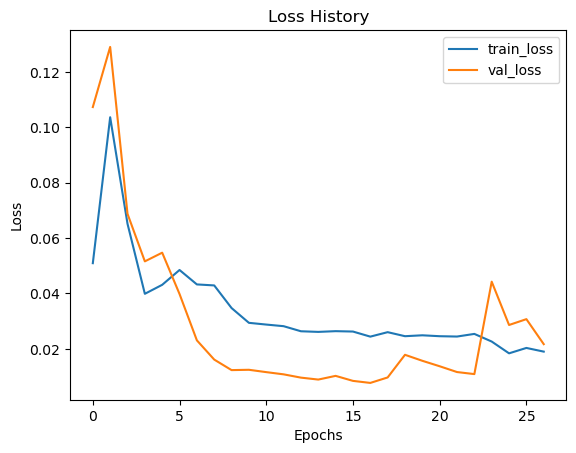

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

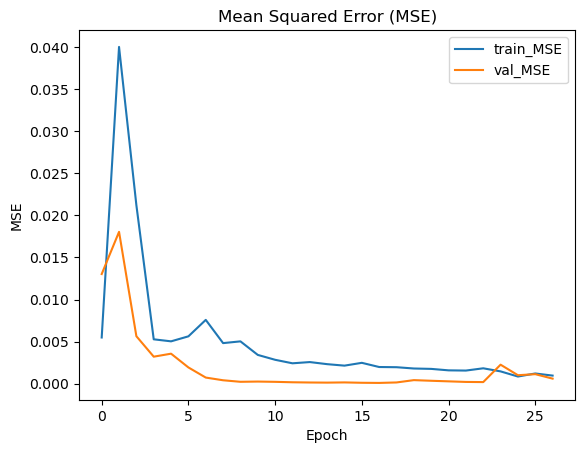

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

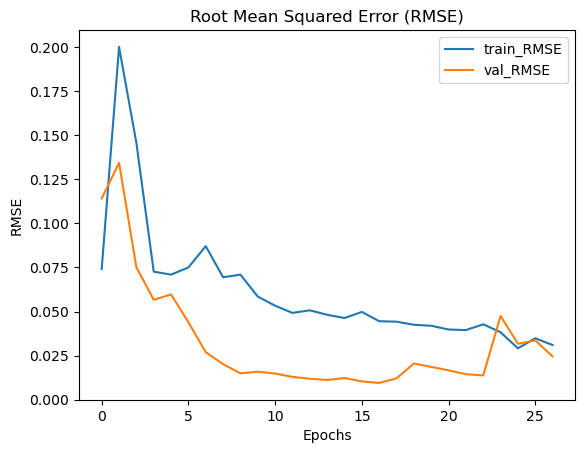

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

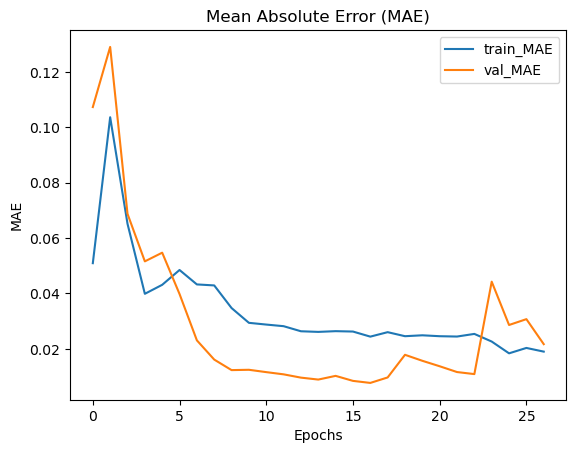

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

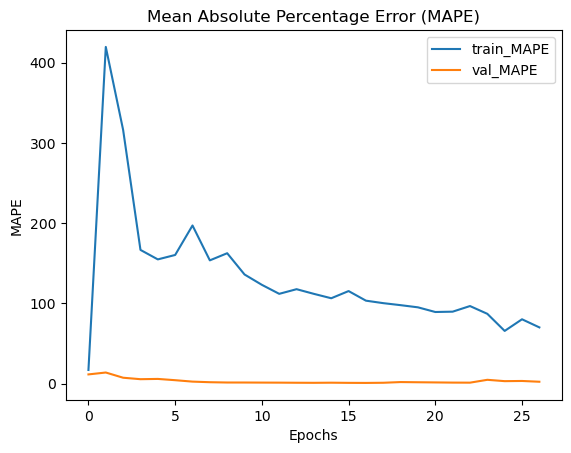

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:32:51.222683: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 2)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


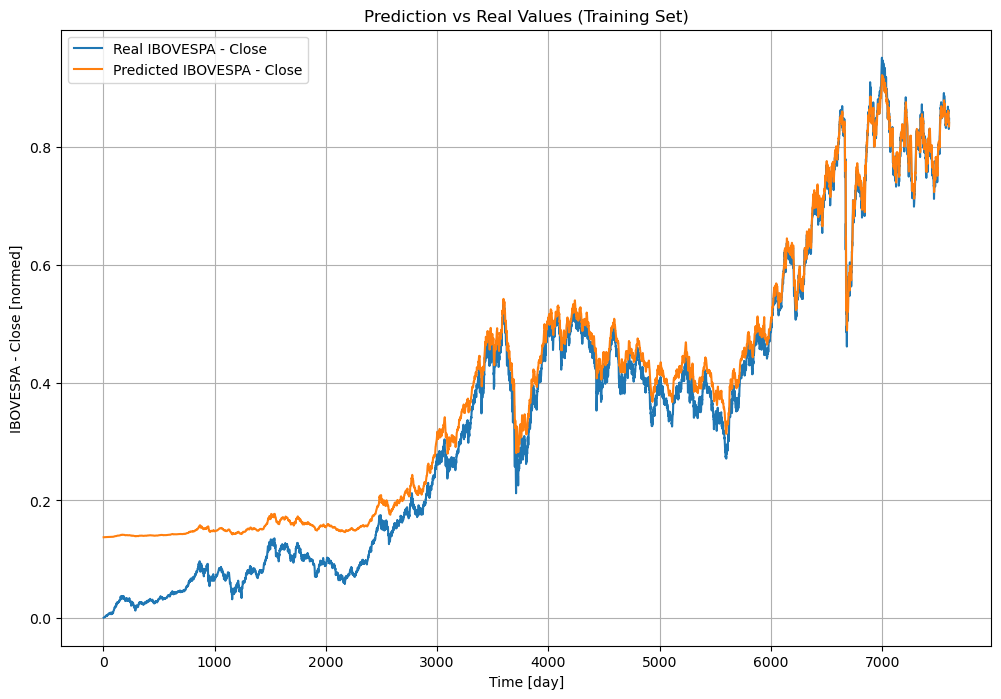

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


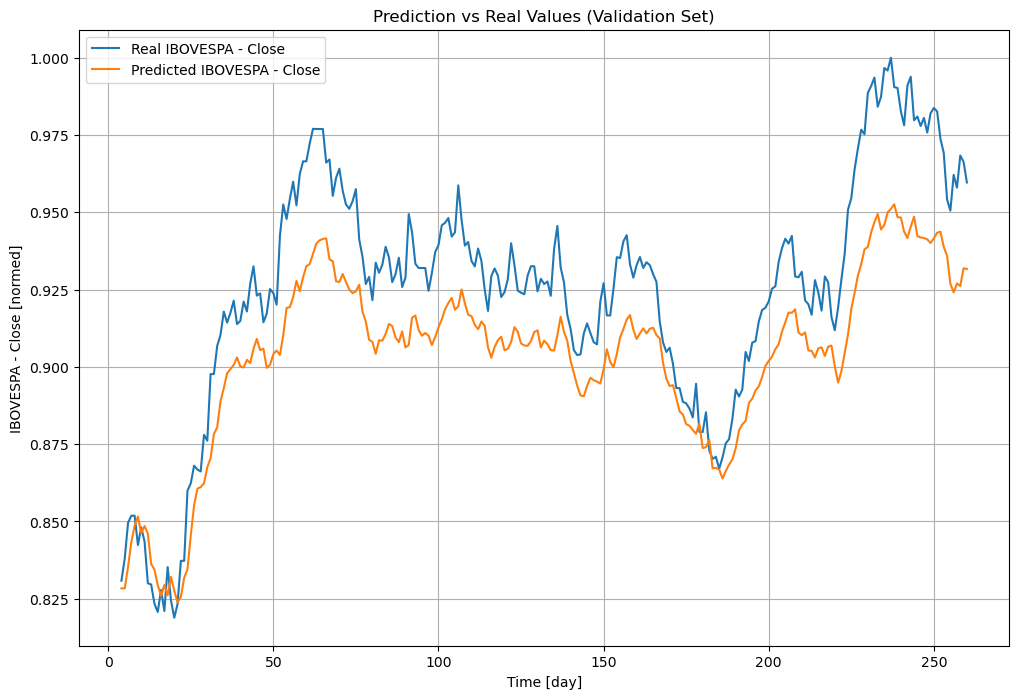

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


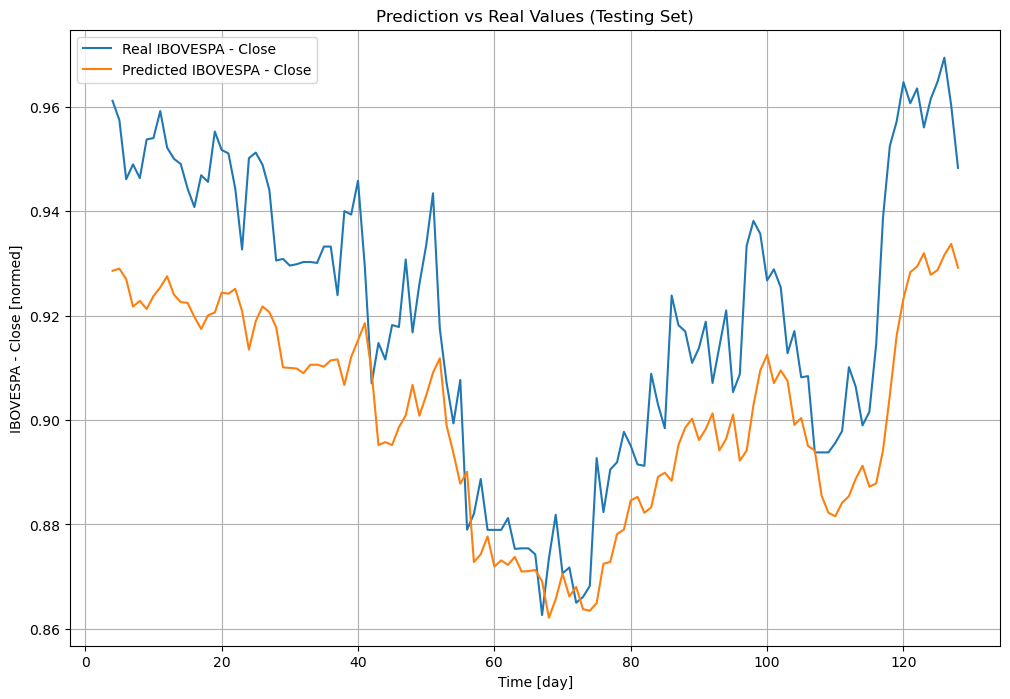

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

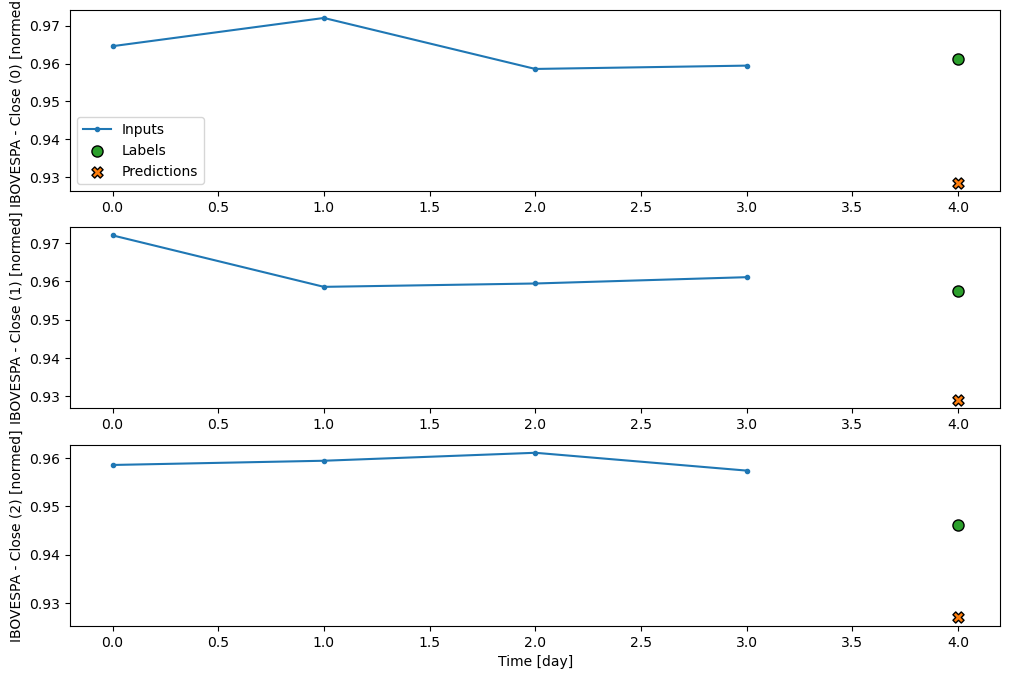

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:13s:882ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step


array([[[0.9285729 , 0.9285729 , 0.9285729 , ..., 0.9285729 ,
         0.9285729 , 0.9285729 ]],

       [[0.92899036, 0.92899036, 0.92899036, ..., 0.92899036,
         0.92899036, 0.92899036]],

       [[0.92696565, 0.92696565, 0.92696565, ..., 0.92696565,
         0.92696565, 0.92696565]],

       ...,

       [[0.9315963 , 0.9315963 , 0.9315963 , ..., 0.9315963 ,
         0.9315963 , 0.9315963 ]],

       [[0.9337264 , 0.9337264 , 0.9337264 , ..., 0.9337264 ,
         0.9337264 , 0.9337264 ]],

       [[0.9291637 , 0.9291637 , 0.9291637 , ..., 0.9291637 ,
         0.9291637 , 0.9291637 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')